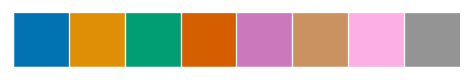

In [2]:
#Import stuff
%matplotlib inline
import base64
from collections import namedtuple, OrderedDict
from datetime import datetime
from itertools import product
import glob
import io
import os
import pickle
import sys
os.environ['PROJ_LIB']=os.path.join(os.environ['HOME'],'.anaconda3','share','proj')

from astropy.stats import LombScargle
import astropy.units as u
from brewer2mpl import qualitative
import cufflinks as cf
#cf.set_config_file(offlinedisipadamentedisipadamente=False, world_readable=True, theme='ggplot')
import h5py
from IPython.display import HTML
import json
import matplotlib as mpl
from matplotlib import animation, rc
from matplotlib.colors import LightSource
from matplotlib.colorbar import cm as colmap2
from matplotlib.patches import Polygon
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap, cm as colmap
import mpld3
from netCDF4 import Dataset as nc, num2date, MFDataset as mc, date2num
import numpy as np
import palettable as colortable
from palettable.mycarta import LinearL_20, CubeYF_20
from palettable.colorbrewer.qualitative import Paired_12
import pandas as pd
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.tools import FigureFactory as FF
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
import pytz
import seaborn as sns
from scipy import signal
from scipy import interpolate
import tempfile
import xarray as xr

sns.set()
fontsize = 30
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : fontsize}
mpl.rc('font', **font)
mpl.rcParams['figure.figsize'] = [15.0,10.0]
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.preamble']=r'\makeatletter \newcommand*{\rom}[1]{\expandafter\@slowromancap\romannumeral #1@} \makeatother'
plt.style.use("seaborn-talk")

pal = sns.palplot(sns.color_palette("colorblind", 8))
sns.set_style("darkgrid", {'axes.grid':True, 'ticks':True})
sns.set_context('talk')
sns.set_palette(pal)
sns.despine()
np.warnings.filterwarnings('ignore')
utc = pytz.UTC
timezone = pytz.timezone('Australia/Darwin')
mpld3.disable_notebook()
#pal

In [3]:
#Define showcode button action
from IPython.display import HTML
showcode='''
<style>
.button {
    background-color: #e7e7e7;
    color: black; /* Green */
    border: none;
    padding: 5px;
    text-align: center;
    text-decoration: none;
    display: inline-block;
    font-size: 10px;
    margin: 2px 2px;
    cursor: pointer;
}
.button5 {border-radius: 50%;}
</style>
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code" class="button button5"></form>

'''

In [4]:
import pandas as pd
import io
import base64

In [5]:
def embed_vid(outvid):
    video = io.open(outvid, 'r+b').read()
    encoded = base64.b64encode(video)
    return HTML(data='''<video alt="test" width="950" height="500" loop="true" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" loop="true" />
             </video>'''.format(encoded.decode('ascii')))

<section data-background="">
<div class="intro-body">
<div class="intro_h1"><h1>Extremes Events of Tropical Island Thunderstorms</h1></div>
<h3>Does a Resolution Increase Improve their Representaion?</h3>
<p><strong><span class="a">Martin Bergemann</span></strong> <span class="b"></span>Uni Melbourne<span></span></p>
<center><img src="HectorCloud.png" style="height:350px;" alt="Hector" height="350px"></center>
</div>
</section>

## 1.0 Introduction
Convective storms in coastal areas of the tropics are of extraordinary importance for the earth climate system by distributing heat and moisture in the tropical atmosphere (CITE). The geography of the Maritime Continent with more than X islands, plays pivotal role in driving the tropical Walker Circulation. In a recent study bla et al. showed that island thunderstorms, often influenced by meso-scale land-sea interactions, release more heat into the atmosphere than any other tropical region.

In [6]:
HTML(showcode)

<figure>
<img src="Topo.png" alt="Study area" style="height:500px;width:600px;"/>
<figcaption  style="text-align: right">Study Area</figcaption>
</figure>

### How Important is the Diurnal Rainfall Cycle?

<figure>
<img src="Fig_002-2.png" alt="Study area" "style='height:400px;'" />
<figcaption  style="text-align: center"></figcaption>
</figure>

* Durnal Cycle is dominated by the Island Thunder Storm *Hector*

### Rainfall and Extreme Events over the Tiwi-Islands by Break and Bursts

<figure>
<img src="Fig_003-2.png" alt="Study area" style='height:400px;'/>
<figcaption  style="text-align: right;">Occurrence of Extreme Events</figcaption>
</figure>

* More destinct Extreme Events during Break-Periods

## Martin Bergemann

In [18]:
import folium
borders = (([-17.091, -7.443] , [122.963, 139.055]),
           ([-14.505, -10.005], [127.385, 134.693]), 
           ([-13.757, -10.757], [129.557, 132.529]))
coordinates = []
for n, (lats, lons) in enumerate(borders):
    x, y =[lons[0], lons[0], lons[1],lons[1]], [lats[0], lats[1], lats[1], lats[0]]
    l = list(zip(x,y))
    l.append(l[0])
    coordinates.append(l)
geoJsonData = {
    "features": [
        {
            "geometry": {
                "coordinates": coordinates[0]
                ,
                "type": "LineString"
            },
            "properties": {
                "stroke": "#fc1717",
                "stroke-opacity": 1,
                "stroke-width": 2
            },
            "type": "Feature"
        },
        {
            "geometry": {
                "coordinates": coordinates[1]
                ,
                "type": "LineString"
            },
            "properties": {
                "stroke": "#1f1a95",
                "stroke-opacity": 1,
                "stroke-width": 2
            },
            "type": "Feature"
        },
         {
            "geometry": {
                "coordinates": coordinates[2]
                ,
                "type": "LineString"
            },
            "properties": {
                "stroke": "orange",
                "stroke-opacity": 1,
                "stroke-width": 2
            },
            "type": "Feature"
        }
        
    ],
    "type": "FeatureCollection"
}
todo = ('Climate Change due to Mountain Formation (COSMO CLM (50km)',
        'Coastal Convection in the Tropics: CV based Pattern Recog.',
        'SMCM: Proto-Type for Coastal Couds',
        'UM: Implement sea-breeze trigger', 
        'Sub-km simulation of Island Storms',
        'Data Analysis Software Develpment')
locations=(
    (52.457739, 13.310591, 'FU Berlin', folium.Icon(color='green', prefix='fa', icon='fa-university')),
    (-37.909199, 147.131103, 'Monash Uni',  folium.Icon(color='blue',  prefix='fa', icon='fa-university')),
    (48.464822, -123.314190, 'Uni of Victoria',  folium.Icon(color='orange', prefix='fa', icon='fa-hands-helping')),
    (50.727208, -3.474619, 'UK Met Office',  folium.Icon(color='black', prefix='fas', icon='fa-handshake')),
    (-37.797191, 142.965023, 'Uni of Melbourne', folium.Icon(color='brown', prefix='fa', icon='fa-university')),
    (53.588599, 9.829234, 'Eu XFEL', folium.Icon(color='brown', prefix='fa', icon='database')))
m = folium.Map(location=(0,0), zoom_start=2.4)
for nn, loc in enumerate(locations):
    folium.Marker(loc[0:2], popup=todo[nn], tooltip=None, icon=loc[-1]).add_to(m)
    

#folium.GeoJson(geoJsonData,
#    style_function=lambda x: {
#        'color' : x['properties']['stroke'],
#        'weight' : x['properties']['stroke-width'],
#        'opacity': 0.6,
#        }).add_to(m)
display(m)
#folium.Icon?

* 10/2004 - 12/2011 : Meteorology (FU Berlin)
* 02/2012 - 03/2013 : Research Associate (FUB / DFG RiftLink)
* 05/2013 - 11/2016 : PhD (Monash Uni)
* 02/2017 - 01/2018 : Post-Doc (Monash Uni)
* 02/2018 - 12/2018 : Post-Doc (Uni Melbourne)
* 09/2018 - present : Software Engineer (Eu XFEL)

## Investigation of Extremes in Island Thunderstorms
<figure>
<img src="Topo.png" alt="Study area" style="height:400px;width:500px;"/>
<figcaption  style="text-align: right">Study Area</figcaption>
</figure>

In [5]:
%%HTML
<ul>
<li>
<p><font color="#fc1717">4 km</font> &rarr; <font color='#1f1a95'>1.33 km</font>&rarr; <font color='orange'> 0.44 km</font>
</li>
<li>80 Vertical Level</li>
<li>8 Ensemble Member, each 6 hours different init time</li>
</p>
</ul>

In [6]:
f =  open('../slides/d3plot.dmp','rb')
p3plot = pickle.load(f)
f.close()
plot_data = pd.read_pickle('WOH_aavg.pkl')
import seaborn as sns
import mpld3

In [7]:
display(p3plot)

In [13]:
%%HTML
<figure>
<video width="750" height="400" loop="true" controls>
  <source src='WeekOfHector-Ens-3.mp4' type="video/mp4">
</video>
 <figcaption  style="text-align: right">Example UM 0.44km Simulation and CPOL</figcaption>
</figure>

<figure>
<img src="Fig_010.png" alt="Study area" style='height:450px;'/>
<figcaption  style="text-align: right">Maps of Rainfall</figcaption>
</figure>

### The simulated Diurnal Cycle

<figure>
<img src="Fig_012.png" alt="Study area" style='height:450px;'/>
<figcaption  style="text-align: right">Time of Rainfall Maximum and Area Avg Diurnal Cycle</figcaption>
</figure>

In [14]:
%%HTML
<figure>
<video width="750" height="400" loop="true" controls>
  <source src='WeekOfHector-Diurnal-2.mp4' type="video/mp4">
</video>
 <figcaption  style="text-align: right">Diurnal Cycle</figcaption>
</figure>

## How well are Extremes Represented?


<figure>
<img src="Fig_013.png" alt="Study area" style='height: 450px;'/>
<figcaption  style="text-align: right">Occurrence of Extreme Events</figcaption>
</figure>

### In Summary:
 * Storms are a Little too early in the Model
 * Occure too Central over Melville Island
 * Extreme Events are Slighly Over Estimated
 * Slight Improvement with Higher Resolution Version

## Storm-Track Analysis
* Analyse Strom tracks using an adopted tracking verion of TINT
* TINT -> Tracking with Phase-Correlation and "Hungarian" similarity mathiching

In [15]:
display(pd.read_pickle('medians.pkl').round(2))

,UM 1.33km,UM 0.44km,CPOL
Area,76.67,61.25,110.68
Duration,60.00,50.00,60.00
Avg-Rain,4.78,5.65,4.52
Max-Rain,6.90,8.56,6.79
Speed,10.03,12.71,12.67
# Storms,73.00,50.00,42.00


## Storm Intensities

<figure>
<img src="Fig_020.png" alt="Study area" style='height: 450px;'/>
<figcaption  style="text-align: right">Distribution of Storm Percentiles</figcaption>
</figure>

### The strongest Stormes (>9th decile)

In [16]:
f =  open('../slides/d3plot_map.dmp','rb')
mapplot = pickle.load(f)
f.close()
display(mapplot)

<figure>
<figcaption  style="text-align: right">TINT Strom Tracks</figcaption>
</figure>

### Storm Properties by Intensity

In [22]:
cycles = pd.read_pickle('storm_cycle.pkl')

In [23]:
cycles

,rr,time,type,uid,avg_rr,dur,quant
0,4.682969,0.000000,CPOL,3,5.529716,0.000000,5.0
1,4.761168,2.040816,CPOL,3,5.529716,2.448980,5.0
2,4.839367,4.081633,CPOL,3,5.529716,4.897959,5.0
3,4.917565,6.122449,CPOL,3,5.529716,7.346939,5.0
4,4.995764,8.163265,CPOL,3,5.529716,9.795918,5.0
5,5.063225,10.204082,CPOL,3,5.529716,12.244898,5.0
6,5.129710,12.244898,CPOL,3,5.529716,14.693878,5.0
7,5.196195,14.285714,CPOL,3,5.529716,17.142857,5.0
8,5.262680,16.326531,CPOL,3,5.529716,19.591837,5.0
9,5.462138,18.367347,CPOL,3,5.529716,22.040816,5.0


In [93]:
data1, data2 = [], []
obs = ('UM 1.33km', 'UM 0.44km', 'CPOL')
colors = ('#1f77b4', '#ff7f0e', 'green')
for ii in range(3):
    df = cycles.loc[cycles.type == obs[ii]].sort_values('time')
    #domain = [ii*1/3, ii*1/3+.3] 
    for i in range(0,6):
        if i == 0:
            tmp = df
            visible = True
        else:
            tmp = df.loc[df.quant == i]
            visible = False
        tmp = tmp.groupby('time').mean()
        y1 = tmp['rr']
        y2 = tmp['dur']
        x1 = tmp.index
        trace = go.Scatter(
            x = x1,
            y = y1,
            name=obs[ii],
            xaxis='x',
            yaxis='y',
            mode = 'markers',
            visible = visible
        )
        data1.append(trace)
        trace = go.Scatter(
            x = x1,
            y = y2,
            name=obs[ii],
            xaxis='x',
            yaxis='y2',
            mode = 'lines',
            showlegend = False,
            line = dict(color = colors[ii], width = 2),
            visible = visible
        )
        data2.append(trace)
    

y_axis_layout=dict( gridcolor='rgb(255,255,255)', showgrid=True, showline=False, showticklabels=True,
           tickcolor='rgb(127,127,127)', ticks='outside', zeroline=False, title='Rain-Rate [mm/h]',
                   range=[2,10])
y_axis_layout2=dict( gridcolor='rgb(255,255,255)', showgrid=True, showline=False, showticklabels=True,
           tickcolor='rgb(127,127,127)', ticks='outside', zeroline=False, title='Duration [min]',
                   range=[0,140], overlaying='y', side='right')
x_axis_layout=dict( gridcolor='rgb(255,255,255)', showgrid=True, showline=False, showticklabels=True,
           tickcolor='rgb(127,127,127)', ticks='outside', zeroline=False, title='Life-Cycle [%]')

layout = go.Layout(
    width=700,
    height=600,
    autosize=False,
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(229,229,229)',
    xaxis=x_axis_layout,
    yaxis=y_axis_layout,
    yaxis2=y_axis_layout2,
    legend=dict(orientation="h"),
    font=dict(family='serif', size=18, color='#7f7f7f')
)

steps=[]
labels={i: str(i) for i in range(1,6)}
labels[0] = 'All'
for n in range(6):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * (len(data1)+len(data2))],
        label=labels[n])
    for ii in range(3):
        step['args'][1][n+ii*6] = True # Toggle i'th trace to "visible"
        step['args'][1][(n+ii*6)+len(data1)] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 0,
    currentvalue = {"prefix": "Quintile: "},
    pad = {"t": 75},
    steps = steps,
    font = dict(size=16)

)]
layout['sliders'] = sliders

fig = go.Figure(data=data1+data2, layout=layout)
display(py.iplot(fig, show_link=False))

<figure>
<img src="Fig_019.png" alt="Study area"  style="height:600px;"/>
<figcaption  style="text-align: right">Comparison Storm Properties by Rainfall Quintiles</figcaption>
</figure>

### Why are Storms more intense in the Sub-km version?

 * Investigation of Cold-Pools


In [19]:
%%HTML
<figure>
<video width="500" loop="true" controls>
  <source src='ColdPool-Ens-1.mp4' type="video/mp4">
</video>
 <figcaption  style="text-align: right">Tracking with Density Potential Temperature Field Pertubation</figcaption>
</figure>

<figure>
<img src="Fig_038.png" alt="Study area" style="height:600px;"/>
<figcaption  style="text-align: right">Comparison Cold-Pool Properties and Mass Flux by Rainfall Quintiles</figcaption>
</figure>

In [20]:
fluxes = {}
lookup = {'UM133': 'UM 1.33km', 'UM044': 'UM 0.44km'}
import h5py
with h5py.File('fluxes.hdf5','r') as h5:
    P = h5['P'][:]
    for key, flx in lookup.items():
        fluxes[flx] = {}
        for var in h5[key].keys():
            fluxes[flx][var] = {}
            for quant in h5[key][var].keys():
                fluxes[flx][var][int(quant)] = h5[key][var][quant][:]             

In [21]:
def split(n, wspace=0.005):
    linspace = np.linspace(0, 1, n+1)
    out = []
    for d in range(n):
        out.append((linspace[d]+wspace/2, linspace[d+1]-wspace/2))
    return out 

* The State of the Atmosphere

In [22]:
from copy import deepcopy

variables=dict(omega=(("$\\overline{\\omega'}$ [m/s]"), (-9.5e-2, 8.5e-1), 1), 
               mflux=("$\\overline{\\omega' q'}$ [m g/kg s]", (-1.2e-1, 1.6), 1000))#
nrow = 0
data = []
fontsize = 18
y_axis_layout=dict( gridcolor='rgb(255,255,255)', showgrid=True, showline=False, showticklabels=True,
                    titlefont=dict(size=fontsize), tickcolor='rgb(127,127,127)', ticks='outside', 
                    zeroline=False, range=[P[0], P[-1]])
x_axis_layout=dict( gridcolor='rgb(255,255,255)', showgrid=True, showline=False, showticklabels=True,
                    tickcolor='rgb(127,127,127)', ticks='outside', zeroline=False, titlefont=dict(size=fontsize))
for layout_dict in (x_axis_layout, y_axis_layout):
    layout_dict['tickfont']=dict(size=fontsize-2)
    layout_dict['automargin'] = True
    
xaxis = {}
yaxis = {}
nplot = 1
nquint = 5
hspace, vspace = 0.01, 0.15
titles = []
colors = ('#1f77b4', '#ff7f0e')
for nvar, (var, prop) in enumerate(variables.items()):
    nrow += 1
    varn, xrange, mul = prop
    for nn, quint in enumerate(range(1,nquint+1)):
        for nrun, (run, flx) in enumerate(fluxes.items()):
            x = flx[var][quint] * mul
            if nrow == 1 :
                yname = 'y'
            else:
                yname = 'y%i'%(nrow*nquint-nquint+1)
            if nplot > 1:
                showlegend=False
            else:
                showlegend=True
            trace = go.Scatter(
                x = x,
                y = P,
                name=run,
                xaxis='x%i'%(nplot),
                yaxis= yname,
                visible = True,
                showlegend = showlegend,
                mode = 'lines',
                line = dict(color = colors[nrun], width = 3)
            )
            data.append(trace)
        yaxis['yaxis%i'%(nplot)] = deepcopy(y_axis_layout)
        xaxis['xaxis%i'%(nplot)] = deepcopy(x_axis_layout)
        xaxis['xaxis%i'%(nplot)]['title'] = varn
        yaxis['yaxis%i'%(nplot)]['domain'] = split(len(variables), vspace)[nrow-1]
        xaxis['xaxis%i'%(nplot)]['domain'] = split(nquint, hspace)[nn]
        xaxis['xaxis%i'%(nplot)]['anchor'] = yname
        yaxis['yaxis%i'%(nplot)]['anchor'] = 'x%i'%nplot
        xaxis['xaxis%i'%(nplot)]['range'] = xrange
        if quint == 1:
            yaxis['yaxis%i'%(nplot)]['title']='Pressure [hPa]'
        if nrow == 1:
            xaxis['xaxis%i'%(nplot)]['range'] = xrange
            sp = split(nquint, hspace)[nn]
            titles.append(dict(x=(xrange[1]-xrange[0])/2 - ((xrange[1]-xrange[0])/20),
                               y=split(nquint, vspace)[-1][-1]+vspace/4,
                               showarrow=False,
                               text='Quintile %i'%quint,
                               xref='x%i'%(nplot),
                               yref='paper'))
        nplot += 1

layout = go.Layout(
    width=750,
    height=800,
    annotations=titles,
    autosize=False,
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(229,229,229)',
    font=dict(family='serif', size=fontsize, color='#7f7f7f')
)
for axis, axlayout in yaxis.items():
    layout[axis] = axlayout
for axis, axlayout in xaxis.items():
    layout[axis] = axlayout

'''
steps=[]
labels={i: str(i) for i in range(1,6)}
labels[0] = 'All'
for n in range(6):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label=labels[n])
    for ii in range(2):
        step['args'][1][n+ii*6] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 5,
    currentvalue = {"prefix": "Quintile: "},
    pad = {"t": 75},
    steps = steps,
    font=dict(size=16)
)]
layout['sliders'] = sliders
'''
fig = go.Figure(data=data, layout=layout)
display(py.iplot(fig, show_link=False))

* The State of the Atmosphere

In [24]:
from copy import deepcopy
from collections import OrderedDict


variables=dict(mse_pre=("$\overline{s_{v_{l}}'}/c_{p_{d}}$ [K]", (-1.4, 2), 1), 
               cloud_pl_rain=("$\overline{q_l'}$ [g/kg]", (-0.02, 0.3), 1))#
nrow = 0
data = OrderedDict()
fontsize = 18
y_axis_layout=dict( gridcolor='rgb(255,255,255)', showgrid=True, showline=False, showticklabels=True,
                    titlefont=dict(size=12), tickcolor='rgb(127,127,127)', ticks='outside', 
                    zeroline=False, range=[P[0], P[-1]])
x_axis_layout=dict( gridcolor='rgb(255,255,255)', showgrid=True, showline=False, showticklabels=True,
                    tickcolor='rgb(127,127,127)', ticks='outside', zeroline=False, 
                    titlefont=dict(size=fontsize-2))
for layout_dict in (x_axis_layout, y_axis_layout):
    layout_dict['tickfont']=dict(size=fontsize-2)
    layout_dict['automargin'] = True
    
xaxis = {}
yaxis = {}
nplot = 1
nquint = 5
hspace, vspace = 0.02, 0.15
titles = []
colors = ('#1f77b4', '#ff7f0e')
for nvar, (var, prop) in enumerate(variables.items()):
    nrow += 1
    varn, xrange, mul = prop
    for nn, quint in enumerate(range(1,nquint+1)):
        for nrun, (run, flx) in enumerate(fluxes.items()):
            x = flx[var][quint] * mul
            if nrow == 1 :
                yname = 'y'
            else:
                yname = 'y%i'%(nrow*nquint-nquint+1)
            if nplot > 1:
                showlegend=False
                name = 'during'
            else:
                showlegend=True
                name = run
            trace = go.Scatter(
                x = x,
                y = P,
                name=name,
                xaxis='x%i'%(nplot),
                yaxis= yname,
                visible = True,
                showlegend = showlegend,
                mode = 'lines',
                line = dict(color = colors[nrun], width = 3)
            )
            data['%s_%s_%s'%(var, quint, run)] = trace
        yaxis['yaxis%i'%(nplot)] = deepcopy(y_axis_layout)
        xaxis['xaxis%i'%(nplot)] = deepcopy(x_axis_layout)
        xaxis['xaxis%i'%(nplot)]['title'] = varn
        yaxis['yaxis%i'%(nplot)]['domain'] = split(len(variables), vspace)[nrow-1]
        xaxis['xaxis%i'%(nplot)]['domain'] = split(nquint, hspace)[nn]
        xaxis['xaxis%i'%(nplot)]['anchor'] = yname
        yaxis['yaxis%i'%(nplot)]['anchor'] = 'x%i'%nplot
        xaxis['xaxis%i'%(nplot)]['range'] = xrange
        if quint == 1:
            yaxis['yaxis%i'%(nplot)]['title']='Pressure [hPa]'
        if nrow == 1:
            xaxis['xaxis%i'%(nplot)]['range'] = xrange
            sp = split(nquint, hspace)[nn]
            titles.append(dict(x=(abs(xrange[1]-xrange[0]))/2 - (abs(xrange[1]-xrange[0]))/3,
                               y=split(nquint, vspace)[-1][-1]+vspace/4,
                               showarrow=False,
                               text='Quintile %i'%quint,
                               xref='x%i'%(nplot),
                               yref='paper'))
        nplot += 1

for quint in range(1, nquint+1):
    for run in ('UM 1.33km', 'UM 0.44km'):
        x = fluxes[run]['cloud_pl_pre'][quint]
        key1 = 'cloud_pl_rain_%i_%s'%(quint, run)
        key2 = 'cloud_pl_pre_%i_%s'%(quint, run)
        new_data = deepcopy(data[key1])
        new_data['visible']=False
        new_data['x'] = x
        new_data['name'] = 'before'
        new_data['showlegend'] = False
        data[key2] = new_data

for quint in range(1, nquint+1):
    for run in ('UM 1.33km', 'UM 0.44km'):
        x = fluxes[run]['cloud_pl_pre'][quint]
        key1 = 'cloud_pl_rain_%i_%s'%(quint, run)
        key2 = 'cloud_pl_prep_%i_%s'%(quint, run)
        new_data = deepcopy(data[key1])
        new_data['line']['dash'] = 'dash'
        new_data['visible']=False
        new_data['x'] = x
        new_data['name'] = 'before'
        new_data['showlegend'] = False
        data[key2] = new_data
        

layout = go.Layout(
    width=750,
    height=800,
    annotations=titles,
    autosize=False,
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(229,229,229)',
    font=dict(family='serif', size=fontsize, color='#7f7f7f')
)
for axis, axlayout in yaxis.items():
    layout[axis] = axlayout
for axis, axlayout in xaxis.items():
    layout[axis] = axlayout
steps=[]
Labels = ('Druing', 'Before', 'Before+During')
for n in range(3):
    step = dict(
        method = 'restyle',  
        args = ['visible', [True] * len(data)],# 'showlegend', [False] * len(data)],
        label=Labels[n])
    step['args'][-1][:2]=[True, True]
    if n == 1:
        step['args'][1][10:20] = 10*[False] # Toggle i'th trace to "visible"
        #step['args'][1][-10:] = 10*[False] # Toggle i'th trace to "visible"
    elif n == 0:
        step['args'][1][-20:] = 20*[False] # Toggle i'th trace to "visible"
    elif n == 2:
        step['args'][1][-20:-10] = 10*[False] # Toggle i'th trace to "visible"
        #step['args'][-1][3] = [True]
        #step['args'][-1][-1] = [True]
        
    steps.append(step)

sliders = [dict(
    active = 0,
    currentvalue = {"prefix": "State: "},
    pad = {"t": 50},
    steps = steps,
    font=dict(size=fontsize)
)]
layout['sliders'] = sliders

fig = go.Figure(data=list(data.values()), layout=layout)
display(py.iplot(fig, show_link=False))

In [25]:
pbl_types = pd.read_pickle('pbl_types.pkl')
pbl_types.head()

,type,quant,fraction,run,precip,ustar,pbl_h
0,1,5,6.726190,UM 1.33km,6.13328,0.45187,629.894409
1,2,5,0.000000,UM 1.33km,6.13328,0.45187,629.894409
2,3,5,70.535714,UM 1.33km,6.13328,0.45187,629.894409
3,4,5,0.416667,UM 1.33km,6.13328,0.45187,629.894409
4,5,5,0.000000,UM 1.33km,6.13328,0.45187,629.894409


* Also somthing in the Boundary Layer

In [26]:
from scipy.stats import norm
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
data = []
var = 'ustar'
Min, Max = 0, 1
X_plot = np.linspace(Min, Max, 1000)
obs = ('UM 1.33km', 'UM 0.44km')
for ii in range(2):
    df = pbl_types.loc[pbl_types.run == obs[ii]] 
    for i in range(0,6):
        if i == 0:
            tmp = df
        else:
            tmp = df.loc[df.quant == i]
        visible = False
        if i == 5:
            visible = True
        x = tmp[var].values[:]#.reshape(1,-1)
        #kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(x)
        kde = gaussian_kde(x)
        log_dens = kde(X_plot)
        trace = go.Scatter(
            x = X_plot,
            y = log_dens,
            name=obs[ii],
            xaxis='x',
            yaxis='y',
            visible = visible,
            mode='lines', 
            fill='tozeroy'
        )
        data.append(trace)
    

y_axis_layout=dict( gridcolor='rgb(255,255,255)', showgrid=True, showline=False, showticklabels=True,
                    tickcolor='rgb(127,127,127)', ticks='outside', zeroline=False, title='Density [%]',
                    range=[0, 3.7])
x_axis_layout=dict( gridcolor='rgb(255,255,255)', showgrid=True, showline=False, showticklabels=True,
                    tickcolor='rgb(127,127,127)', ticks='outside', zeroline=False, title='u* [m/s]')

layout = go.Layout(
    width=700,
    height=600,
    autosize=False,
    paper_bgcolor='rgb(255,255,255)',
    plot_bgcolor='rgb(229,229,229)',
    xaxis=x_axis_layout,
    yaxis=y_axis_layout,
    font=dict(family='serif', size=18, color='#7f7f7f')
)

steps=[]
labels={i: str(i) for i in range(1,6)}
labels[0] = 'All'
for n in range(6):
    step = dict(
        method = 'restyle',  
        args = ['visible', [False] * len(data)],
        label=labels[n])
    for ii in range(2):
        step['args'][1][n+ii*6] = True # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active = 5,
    currentvalue = {"prefix": "Quintile: "},
    pad = {"t": 75},
    steps = steps,
    font=dict(size=16)
)]
layout['sliders'] = sliders

fig = go.Figure(data=data, layout=layout)
display(py.iplot(fig, show_link=False))

In [28]:
%%HTML
<figure>
<video width="750" height="350" loop="true" controls>
  <source src='ColdPool_nativ_2.mp4' type="video/mp4">
</video>
 <figcaption  style="text-align: right">Cold-Pool (center) and Rainfall (outer) for two ensemble member</figcaption>
</figure>
<img src="Diagram1.png" alt="Study area" style="height:150px;"/>
<p>One possible problem: Micro-Phys. depends on RH<sub>crit</sub> that is chosen on 80!! levels</p>

<figure>
<img src="xfel-overview.png" alt="EuXFEL" style="height:530px;width:900px;"/>
<figcaption  style="text-align: right"></figcaption>
</figure>

<figure>
<img src="karabo.png" alt="EuXFEL" style="height:530px;width:910px;"/>
<figcaption  style="text-align: right"></figcaption>
</figure>